## Problem Statement
The data scientists at Big Mart have collected sales data for one thousand,
five hundred and fifty-nine products across ten stores in different cities. Furthermore, certain attributes of each product and store have been defined. The aim is to build a predictive model and find the sales figures of each
product at a particular store.<br>
Using this model, Big Mart will try to understand the properties of
products and stores, which play a key role in increasing sales.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [63]:
x_train = pd.read_csv('Resources/bigmart_train.csv')
x_test = pd.read_csv('Resources/bigmart_test.csv')

In [64]:
x_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Item_Outlet_Sales is the target output

In [65]:
print(x_train.shape)
print(x_test.shape)

(8523, 12)
(5681, 11)


In [66]:
x_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [67]:
# Combine Both train and test data sets
x_train['source'] = 'x_train'
x_test['source'] = 'x_test'
df= pd.concat([x_train, x_test], ignore_index=True)
print(df.shape)
df.head()

(14204, 13)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,x_train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,x_train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,x_train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,x_train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,x_train


In [68]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [69]:
# check for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Item weight, Outlet_size, Item_Outlet_Sales have missing values<br>
Now, cheking missing values

In [70]:
print(df['Item_Fat_Content'].unique())
print(df['Item_Fat_Content'].value_counts())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


We can see that low fat products are the most abundant

In [71]:
print(df['Outlet_Size'].unique())
print(df['Outlet_Size'].value_counts())
print(df['Outlet_Size'].mode()[0])

['Medium' nan 'High' 'Small']
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Medium


We can see that majority of outlets are medium and small-scale outlets and medium is the most commonly occuring value.<br>

So replacing missing values in Outlet_Size with the value "medium".<br>
And Also for Outlet_weight replacing missing values with mean value.

In [72]:
df['Outlet_Size'] = df['Outlet_Size'].fillna( df['Outlet_Size'].mode()[0] )
df['Item_Weight'] = df['Item_Weight'].fillna( df['Item_Weight'].mean() )

<AxesSubplot:>

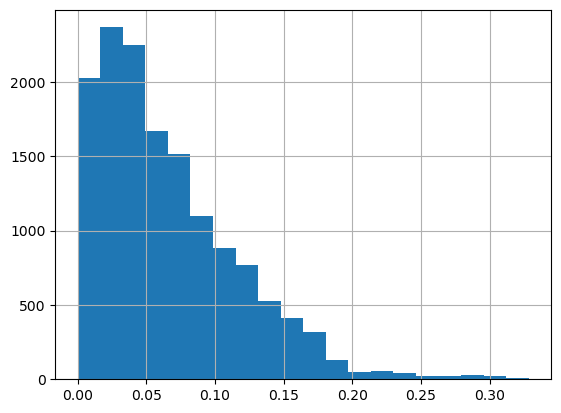

In [73]:
# plot histogram to reveal the distribution of Item_Visibility column
df['Item_Visibility'].hist(bins=20)

In [74]:
print(df['Outlet_Establishment_Year'].unique())

[1999 2009 1998 1987 1985 2002 2007 1997 2004]


In [75]:
# Calculate Outlet_Age and adding column
df['Outlet_Age']= 2022 - df['Outlet_Establishment_Year']
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,x_train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,x_train,13


### Outliers :
An Outlier is a data point that lies outside the overall pattern in a distribution. <br>
A commonly used rule states that a data point is a outlier if it is more than 1.5*IQR above the third or below the first quantile.<br>

Using this, one can remove the outliers and output the resulting data in fill_data variable.

In [76]:
# First Quantile and Second Quantile and Interquantile range (IQR)
Q1 = df['Item_Visibility'].quantile(0.25)
Q3 = df['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1

In [77]:
# Removeing Outliers
fill_df = df.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [78]:
fill_df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,x_train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,x_train,13


In [79]:
fill_df.shape

(13943, 14)

In [80]:
df = fill_df

Converting Item_Visibility numeric data to categorical data as low_viz, viz and high viz

In [83]:
df["Item_Visibility_bins"] = pd.cut(df['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels = ['low viz', 'viz', 'high viz'])
df['Item_Visibility_bins'].value_counts()

Low viz     7363
viz         4283
high viz    1418
Name: Item_Visibility_bins, dtype: int64

Replace NULL values to low viz

In [85]:
df['Item_Visibility_bins'] = df['Item_Visibility_bins'].replace(np.nan, 'low viz', regex = True )